In [31]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [32]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


In [33]:
print(df.columns)
df.head()
df.shape

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


(569, 31)

In [34]:
from sklearn.preprocessing import StandardScaler
features = df.columns[0:30] #grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])

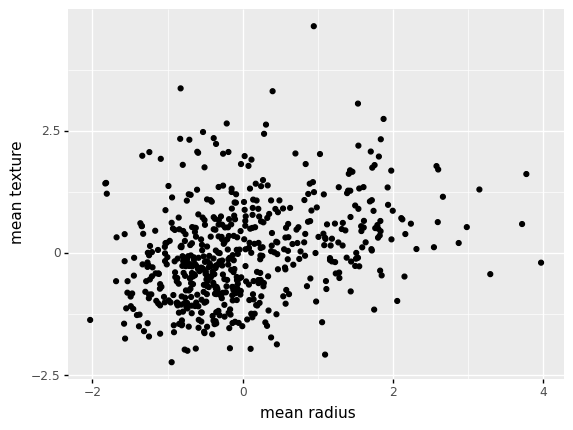

<ggplot: (168964143701)>

In [35]:
ggplot(df, aes(x = "mean radius", y = "mean texture")) + geom_point()

In [36]:
pca = PCA()
pca.fit(df[features])
pca.explained_variance_ratio_


array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [37]:
pcaDF = pd.DataFrame({"pc": range(1,31),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,pc,expl_var,cum_var
0,1,0.442720,0.442720
1,2,0.189712,0.632432
2,3,0.093932,0.726364
3,4,0.066021,0.792385
4,5,0.054958,0.847343


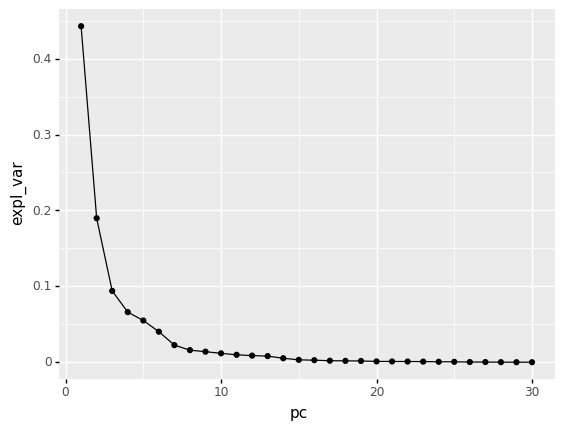

<ggplot: (168966372392)>

In [38]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

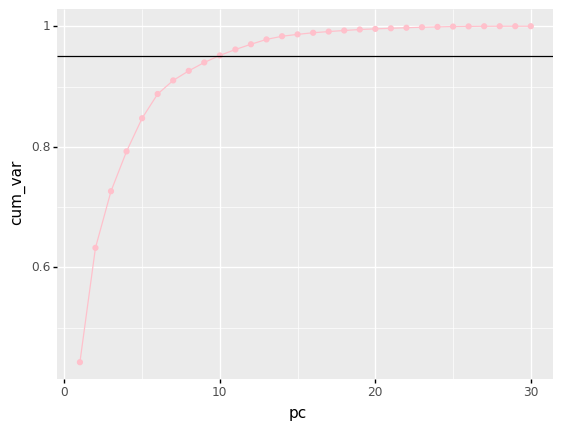

<ggplot: (168966406587)>

In [39]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [40]:
from sklearn.linear_model import LogisticRegression

data = F.transform(df[features])
df4 = pd.DataFrame(data[:,0:4])


df10 = pd.DataFrame(data[:, 0:10])

#modeMod1
lr1 = LogisticRegression()
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))

#modeMod1
lr2 = LogisticRegression()
lr2.fit(df10, df["target"])
print("10 PCs:   ", lr2.score(df10, df["target"]))

#modeMod1
lr3 = LogisticRegression()
lr3.fit(df4, df["target"])
print("4 PCs:    ", lr3.score(df4, df["target"]))

all data:  0.9876977152899824
10 PCs:    0.9859402460456942
4 PCs:     0.9701230228471002


## Diabetes Dataset

In [79]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)



In [80]:
print(df.columns)
df.describe()


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [81]:
# from sklearn.preprocessing import StandardScaler
# features = df.columns[0:10] #grab all numeric columns of interest
# z = StandardScaler()
# df[features] = z.fit_transform(df[features])

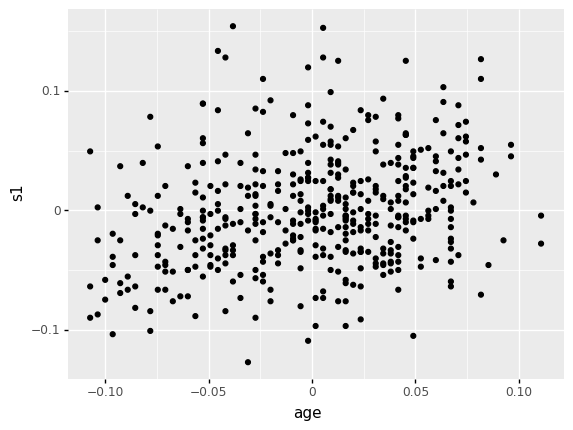

<ggplot: (168964067804)>

In [82]:
ggplot(df, aes(x = "age", y = "s1")) + geom_point()

In [83]:
pca = PCA()
print(features)

pca.fit(df[features])
pca.explained_variance_ratio_

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


array([0.40242142, 0.14923182, 0.12059623, 0.09554764, 0.06621856,
       0.06027192, 0.05365605, 0.04336832, 0.00783199, 0.00085605])

In [84]:
pcaDF = pd.DataFrame({"pc": range(1,11),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head(11)

,pc,expl_var,cum_var
0,1,0.402421,0.402421
1,2,0.149232,0.551653
2,3,0.120596,0.672249
3,4,0.095548,0.767797
4,5,0.066219,0.834016
5,6,0.060272,0.894288
6,7,0.053656,0.947944
7,8,0.043368,0.991312
8,9,0.007832,0.999144
9,10,0.000856,1.000000


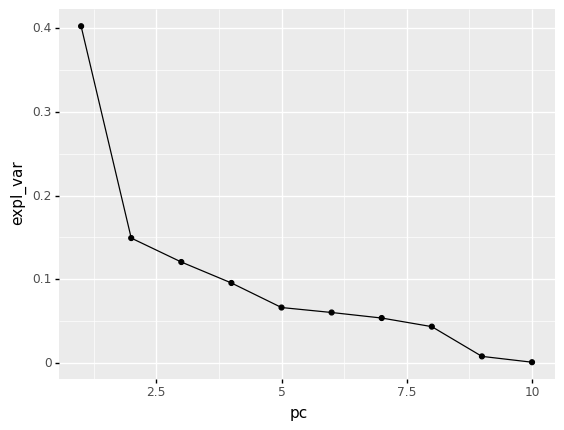

<ggplot: (168964143728)>

In [85]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

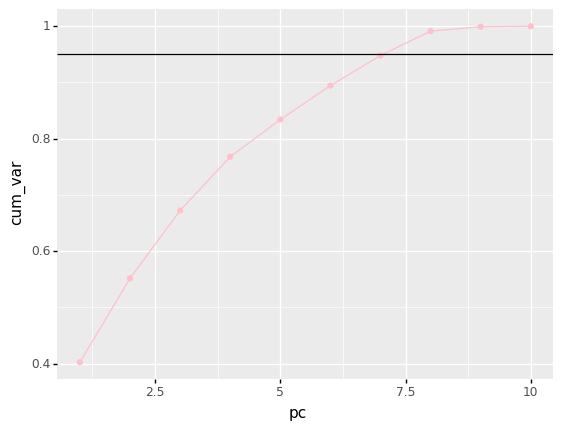

<ggplot: (168965782297)>

In [86]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
print(features)
data = pca.transform(df[features])

df5 = pd.DataFrame(data[:,0:5])

df8 = pd.DataFrame(data[:, 0:8])

#modeMod1
lr1 = GradientBoostingRegressor()
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))

#modeMod1
lr2 = GradientBoostingRegressor()
lr2.fit(df8, df["target"])
print("8 PCs:   ", lr2.score(df8, df["target"]))

#modeMod1
lr3 = GradientBoostingRegressor()
lr3.fit(df5, df["target"])
print("5 PCs:    ", lr3.score(df5, df["target"]))

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
all data:  0.7990392018966864
8 PCs:    0.8329515245099696
5 PCs:     0.8028421894367508


In [116]:
from catboost import CatBoostRegressor
print(features)
data = pca.transform(df[features])

df4 = pd.DataFrame(data[:,0:4])

df8 = pd.DataFrame(data[:, 0:8])

#modeMod1
CB1 = CatBoostRegressor(verbose=0)
CB1.fit(df[features], df["target"])
print("all data: ", CB1.score(df[features], df["target"]))

#modeMod1
CB2 = CatBoostRegressor(verbose=0)
CB2.fit(df8, df["target"])
print("8 PCs:   ", CB2.score(df8, df["target"]))

#modeMod1
CB3 = CatBoostRegressor(verbose=0)
CB3.fit(df4, df["target"])
print("4 PCs:    ", CB3.score(df4, df["target"]))

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
all data:  0.9693883933025135
8 PCs:    0.9791683204711558
4 PCs:     0.9323886356320412
